In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

RANDOM_STATE = 55 

In [2]:
df = pd.read_csv("/Users/bhavyasoni/Documents/dataSet/heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
var = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [5]:
df = pd.get_dummies(data = df, prefix= var, columns=var)

In [6]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [7]:
features = [x for x in df.columns if x not in 'HeartDisease']

In [8]:
print(len(features))

20


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['HeartDisease'], train_size= 0.8, random_state=55)

In [10]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 734
validation samples: 184
target proportion: 0.5518


In [11]:
#Decision Tree accuracy

In [12]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] 

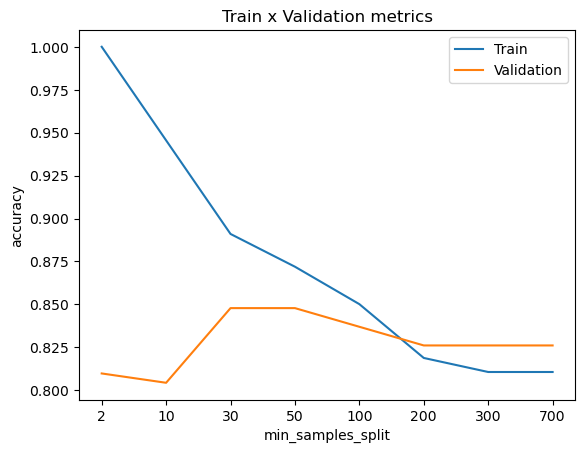

In [13]:
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,random_state = 55).fit(X_train,y_train)
    predictions_train = model.predict(X_train) #This will make predictions based on the Training data 
    predictions_test = model.predict(X_test) #This one is done for the Testing data
    accuracy_list_train.append(accuracy_score(predictions_train,y_train))
    accuracy_list_test.append(accuracy_score(predictions_test,y_test))

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

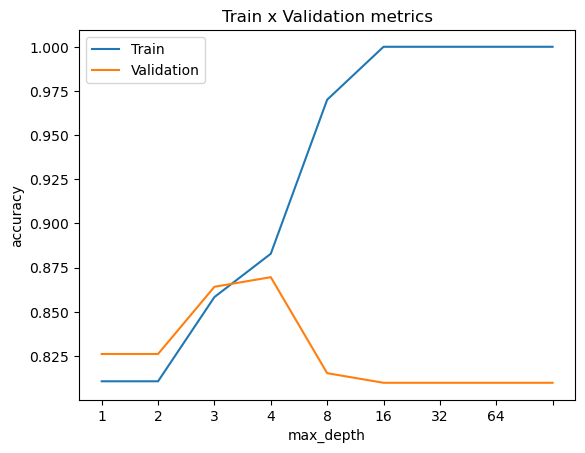

In [14]:
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) #This will make predictions based on the Training data 
    predictions_test = model.predict(X_test) ##This one is done for the Testing data
    accuracy_list_train.append(accuracy_score(predictions_train,y_train))
    accuracy_list_test.append(accuracy_score(predictions_test,y_test))

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [15]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50, max_depth = 4, random_state = RANDOM_STATE).fit(X_train,y_train)

In [16]:
print(f"Metrics train     \t:\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation\t:\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")

Metrics train     	:	Accuracy score: 0.8665
Metrics validation	:	Accuracy score: 0.8665


In [17]:
#Cant rely on this as this particular model will not be as efficient as it is now if new data is added to train. Hence we use ensemble of trees

In [18]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] 
n_estimators_list = [10,50,100,500]

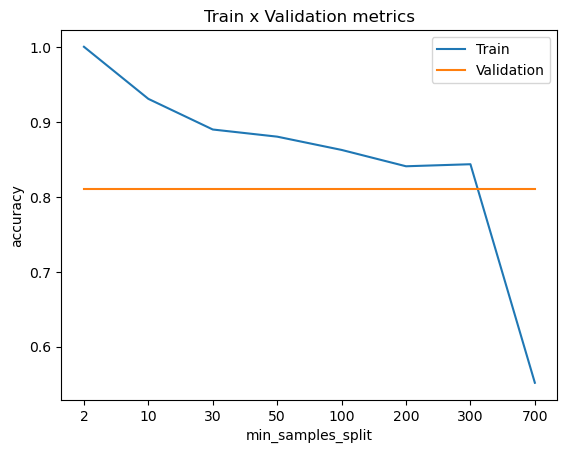

In [19]:
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split, random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_test)
    accuracy_list_train.append(accuracy_score(predictions_train,y_train))
    accuracy_list_test.append(accuracy_score(predictions_test,y_test))

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

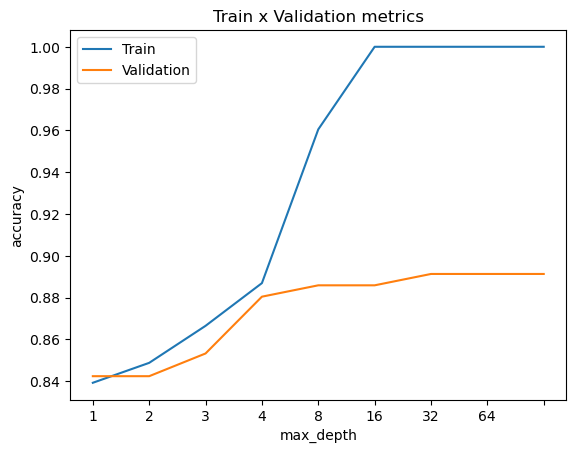

In [20]:
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth = max_depth, random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) #This will make predictions based on the Training data 
    predictions_test = model.predict(X_test) ##This one is done for the Testing data
    accuracy_list_train.append(accuracy_score(predictions_train,y_train))
    accuracy_list_test.append(accuracy_score(predictions_test,y_test))

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

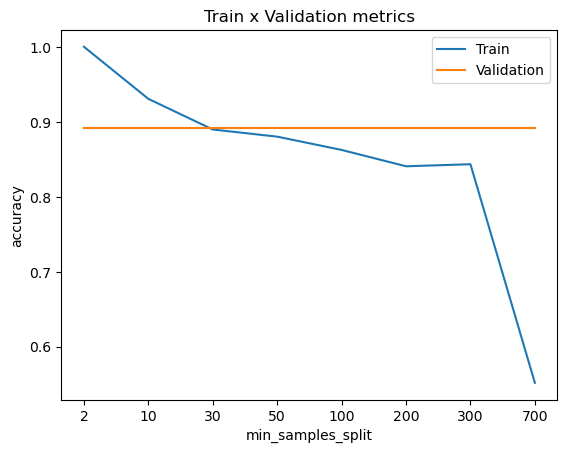

In [21]:
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split, random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) 
    predictions_val = model.predict(X_test)
    accuracy_list_train.append(accuracy_score(predictions_train,y_train))
    accuracy_list_test.append(accuracy_score(predictions_test,y_test))

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [22]:
random_forest_model = RandomForestClassifier(n_estimators = 30, max_depth = 32,  min_samples_split = 10).fit(X_train,y_train)

In [23]:
print(f"Metrics train    :\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}")
print(f"Metrics test     :\tAccuracy score: {accuracy_score(random_forest_model.predict(X_test),y_test):.4f}")

Metrics train    :	Accuracy score: 0.9360
Metrics test     :	Accuracy score: 0.8913


In [24]:
#We can clearly see that the Random Forest Classification is more accurate than the Decision Tree Model.

In [25]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [26]:
X_inp = np.array([[51, 153, 127, 1, 152 , 2.5, False, True, False, False, False, False , False, False, True, True, False, False, False, True]])
y_pred = random_forest_model.predict(X_inp)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
if y_pred == 1:
    print("Heart Disease Detected! ")
else:
    print("No Heart Disease Present")

No Heart Disease Present
